# Playing with Pandas

**Pandas** is a Python Library for Data manipulation and analysis.

Some of the reasons it's useful:

* Easy read and write from different sources/formats
* Easy to do common tasks like handling missing data
* Well-suited for tabular data with different types of columns
* Plays well with other libraries like Numpy (In fact, builds on top of it). 

Basically, it's easy to load, process and analyze data with *Pandas*.

## The Data Science Process

* Define the Problem/Question
* Acquire the data
* Explore and Prepare Data <span style="color:red">(Pandas)</span>
* Build and Evaluate Models 
* Communicate Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Structures: Intro and basic access

The main datastructures in *Pandas* are **Series** and **DataFrame**.

### Series

* One-dimensional array-like structure
* capable of holding any (one) data type
* Has indices

So, it's a numpy array with row labels and a name. Basically a *smart* array.

![A series is an indexed array](../images/Series.png)

In [2]:
# "Normal" integer indexed series
s = pd.Series([22, 12, 18, 25, 30])
s

0    22
1    12
2    18
3    25
4    30
dtype: int64

In [3]:
# Series with String index and a name
s = pd.Series([22, 12, 18, 25, 30], index=['Anna', 'Bob', 'Carol', 'Dave', 'Elsa'], name='Age')
s

Anna     22
Bob      12
Carol    18
Dave     25
Elsa     30
Name: Age, dtype: int64

In [4]:
s['Bob']

12

In [5]:
s['Anna': 'Carol']   #aafule define garek indexing bata tei samma ko aauxa.

Anna     22
Bob      12
Carol    18
Name: Age, dtype: int64

In [7]:
s = pd.Series([22, 12, 18, 25, 30], index=[20,30,40,50,60], name='Age')
s

20    22
30    12
40    18
50    25
60    30
Name: Age, dtype: int64

In [9]:
s[2:4]

40    18
50    25
Name: Age, dtype: int64

In [10]:
s.loc[0:2]

Series([], Name: Age, dtype: int64)

### DataFrame

* Two-dimenstional tabular data structure
* Has indices and columns
* Columns can be of different data types

Could think of it as:

* Dictionary of *Series* objects with same index, or
* A 2-D numpy array with row and column labels.

![A DataFrame has data, row labels and column labels](../images/DataFrame.png)

In [24]:
#indexing garne tarika (1 method)
people_data = [[22, 'F'], [12, 'M'], [18, 'F'], [25, 'M'], [30, 'F']]
names = ['Anna', 'Bob', 'Carol', 'Dave', 'Elsa']
fields = ['Age', 'Gender']

In [25]:
df = pd.DataFrame(people_data, index=names, columns=fields)
df

,Age,Gender
Anna,22,F
Bob,12,M
Carol,18,F
Dave,25,M
Elsa,30,F


In [26]:

df = pd.DataFrame({'Age': [22, 12, 18, 25, 30], 'Gender': ['F', 'M', 'F', 'M', 'F'], 'Id': [12, 13, 14, 15, 16]}, index=names)
df

,Age,Gender,Id
Anna,22,F,12
Bob,12,M,13
Carol,18,F,14
Dave,25,M,15
Elsa,30,F,16


In [27]:
df.index

Index(['Anna', 'Bob', 'Carol', 'Dave', 'Elsa'], dtype='object')

In [28]:
df.columns

Index(['Age', 'Gender', 'Id'], dtype='object')

In [29]:
df['Age']

Anna     22
Bob      12
Carol    18
Dave     25
Elsa     30
Name: Age, dtype: int64

In [30]:
df.loc['Anna']

Age       22
Gender     F
Id        12
Name: Anna, dtype: object

In [31]:
df[['Age', 'Id']] #data frame mai aayo.(multiple nai xa ni ta)

,Age,Id
Anna,22,12
Bob,12,13
Carol,18,14
Dave,25,15
Elsa,30,16


In [32]:
df[[Age]] #single bhaye ni list ko form ma xa

NameError: name 'Age' is not defined

In [33]:
df.loc['Anna': 'Carol', ['Age', 'Id']]

,Age,Id
Anna,22,12
Bob,12,13
Carol,18,14


### Exercise 1: 

Select columns *Age* and *Gender* for *Bob* and *Elsa*

In [40]:
df.loc[['Bob','Elsa'] , ['Age', 'Gender']]

,Age,Gender
Bob,12,M
Elsa,30,F


In [41]:
df.loc['Bob':'Elsa' , 'Age':'Gender']  #etikai bujhna matrai ho.

,Age,Gender
Bob,12,M
Carol,18,F
Dave,25,M
Elsa,30,F


### Boolean Indexing

In [46]:
df[df['Gender'] == 'M']

,Age,Gender,Id
Bob,12,M,13
Dave,25,M,15


### Exercise 2:

select rows where *Age* > 20. 

In [53]:
df[(df['Age'] >= 20) & (df['Gender'] =='F')] #if gender pani nikalnu bhaneko xa qsn ma.

,Age,Gender,Id
Anna,22,F,12
Elsa,30,F,16


In [54]:
df[df['Age'] >= 20] #exercise2 ko ans ho.

,Age,Gender,Id
Anna,22,F,12
Dave,25,M,15
Elsa,30,F,16


## 2. Loading Data

We'll continue our exploration of *Pandas* on the [Titanic Dataset](https://www.kaggle.com/c/titanic).

It has data on the people who were onboard the Titanic and whether they survived or not. 
The main analysis is to determine what sorts of people were likely to survive.

*Note*: Instead of `df['ColumnName']`, we can actually do `df.ColumnName` but for consistency we'll use the former throughout this notebook.

In [58]:
df = pd.read_csv('titanic.csv')

# Quick peek of the data. First 5 rows.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Basic Exploration and Analysis

Let's look at data dimensionality, and feature names and types.

In [59]:
df.shape

(891, 12)

So the table contains 891 rows and 12 columns.

In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We can use `info()` method to output some general information about the DataFrame:

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can use `describe()` method to generate descriptive statistics.

In [62]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What was the Age distribution?

Text(0,0.5,'No. of People')

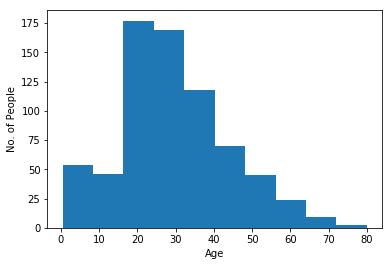

In [63]:
df['Age'].plot.hist()
plt.xlabel('Age')
plt.ylabel('No. of People')

In [64]:
# Mean Age  #average value
df['Age'].mean()

29.69911764705882

In [65]:
# Median Age   #bich ko value
df['Age'].median()

28.0

In [66]:
# Count of columns. Number of non-null values
df['Age'].count()

714

In [67]:
df['Age'].max()

80.0

### What was the proportion of men and women? 

We can use the `value_counts()` method on a particular column to get the values.

In [68]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Or we can plot the output.

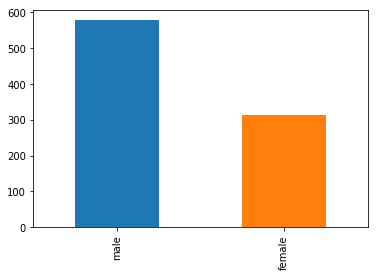

In [69]:
df['Sex'].value_counts().plot.bar()

### Exercise 3:

What was the mean age of the men? 

In [76]:
mdf = df[df['Sex'] == 'male']

In [79]:
mdf['Age'].mean()

30.72664459161148

### Exercise 4:

Plot the histogram of *Fare* paid by 1st class passengers (i.e where *Pclass* is *1*).

In [82]:
mdf = df[df['Pclass'] == 1]                                   #select part

Text(0,0.5,'No. of People')

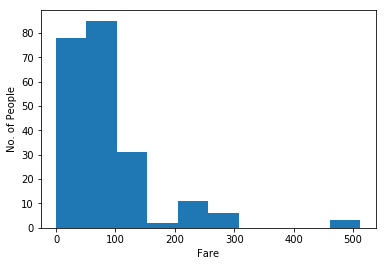

In [84]:
mdf['Fare'].plot.hist()                                      #reduce part
plt.xlabel('Fare')
plt.ylabel('No. of People')

### What was the survival by sex?

In [87]:
survival_series = df.groupby(by=['Survived', 'Sex'])['Sex'].count()

In [90]:
survival_series

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

In [91]:
df.groupby(by=['Survived', 'Sex'])['Sex'].count().unstack('Survived')

Survived,0,1
Sex,,
female,81,233
male,468,109


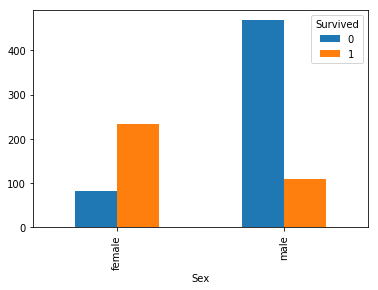

In [85]:
df.groupby(by=['Survived', 'Sex'])['Sex'].count().unstack('Survived').plot(kind='bar')

### Exercise 5

What was the survival by Passenger class? 

Plot a bar chart (like above) showing survival by class (*Pclass*). 

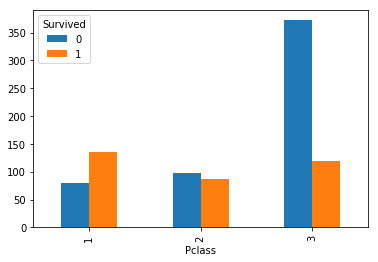

In [92]:
df.groupby(by=['Survived', 'Pclass'])['Pclass'].count().unstack('Survived').plot(kind='bar')

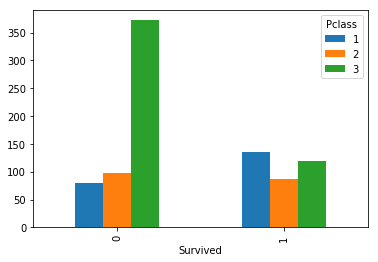

In [93]:
df.groupby(by=['Survived', 'Pclass'])['Pclass'].count().unstack('Pclass').plot(kind='bar')

## 4. Data Manipulation and Processing

When using the data for ML models, we need the features to be numerical. 

To do so, we may need to: drop unnecessary columns, fill missing values, convert non-numerical values to numerical values, etc. 

Also, we may add in new features.

### Dropping columns

In [94]:
df.drop('Cabin', axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


However, it doesn't drop in place. So `cabin` is still present in `df`.

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


So we need to assign the returned df back. (Or we can use `inplace=True`). Here, let's create another DataFrame with the columns removed.

In [96]:
new_df = df.drop(['Ticket', 'Cabin', 'Name'], axis=1)
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Handling missing values

We can handle missing values by either dropping rows with missing values or filling it in with sensible alternatives. Here, we do the latter.

Let's quickly check which columns have missing values.

In [97]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


So `Age` and `Embarked` have missing values.

In [98]:
# Fill "Age" with mean value
mean_age = new_df['Age'].mean()
mean_age

29.69911764705882

In [106]:
new_df['Age'] = new_df['Age'].fillna(mean_age)

In [107]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


### Exercise 6:

Fill missing values in the *Embarked* column by its mode (most common value). 

Note: `mode()` actually returns a `Series` instead of a single value. Take the first element.

In [105]:
mode_Embarked = new_df['Embarked'].mode()
mode_Embarked [0]

'S'

In [110]:
new_df['Embarked'] = new_df['Embarked'].fillna(mode_Embarked[0])

In [111]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


### Mapping Features

We can use the `map()` function to map values in a column to new values.

In [112]:
gender_map = {'male': 0, 'female': 1}
new_df['Sex'] = new_df['Sex'].map(gender_map)
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


### Exercise 7:

Map the value of `Embarked` to numerical values. 

(If needed use `value_counts` or `unique()` to see possible values in `Embarked`)

In [113]:
new_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [116]:
station_map = {'S': 0, 'C': 1, 'Q':2}
new_df['Embarked'] = new_df['Embarked'].map(station_map)
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


## Wrapping up

Now that we have the DataFrame ready for the next stage. Let's save it using the `to_csv` function.

In [117]:
# One last check
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [118]:
new_df.to_csv('processed_titanic.csv', index=False)

## Endnotes and Links

* [Pandas: Official Documentation](https://pandas.pydata.org/pandas-docs/stable/). Obviously useful.
* [Awesome Cheatsheet](https://www.enthought.com/wp-content/uploads/Enthought-Python-Pandas-Cheat-Sheets-1-8-v1.0.2.pdf). Concise useful cheatsheet. 
* [A visual guide to Pandas](https://www.youtube.com/watch?v=9d5-Ti6onew) A visual intro.
* [Titanic Kernels](https://www.kaggle.com/c/titanic/kernels). For other Data Analysis and Exploration on the Titanic Dataset.
* [Pandas exercises](https://github.com/guipsamora/pandas_exercises). For tons of exercise material.
* [Pandas .head() to .tail()](https://www.youtube.com/watch?v=7vuO9QXDN50) Online workshop. 